In [1]:
%matplotlib inline

In [2]:
from vgg16 import Vgg16
from utils import plots

Using TensorFlow backend.


In [3]:
path = '/mnt/data/dogscats/'
batch_size = 64

In [4]:
vgg = Vgg16()

In [6]:
batches = vgg.get_batches(path=path + 'train', batch_size=batch_size)
val_batches = vgg.get_batches(path=path + 'valid', batch_size=batch_size*2)
vgg.finetune(batches)
vgg.fit(batches, val_batches, nb_epoch=1)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/1
23000/23000 [==============================] - 818s - loss: 0.4311 - acc: 0.8713 - val_loss: 0.2142 - val_acc: 0.9180


In [19]:
imgs, labels = next(batches)

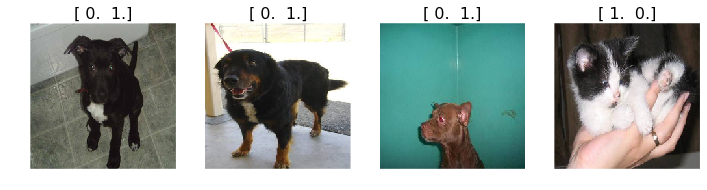

In [20]:
plots(imgs, titles=labels)

In [21]:
vgg.predict(imgs, True)

(array([ 0.1872,  0.1854,  0.3369,  0.2521], dtype=float32),
 array([195, 214, 736, 377]),
 [u'Boston_bull', u'Gordon_setter', u'pool_table', u'marmoset'])

In [23]:
vgg.classes[:4]

[u'tench', u'goldfish', u'great_white_shark', u'tiger_shark']

## Kaggle Competition

In [1]:
from vgg16 import Vgg16
from utils import plots
from keras.models import Sequential

Using TensorFlow backend.


In [2]:
vgg = Vgg16()

## Setup Paths

In [10]:
model_save_path = '/mnt/models/dogscats'
train_path = '/mnt/data/dogscats/kaggle/' + 'train/'
val_path = '/mnt/data/dogscats/kaggle/' + 'valid/'
test_path = '/mnt/data/dogscats/kaggle/' + 'test/'
batch_size = 64

## Setup batch generators

In [8]:
batches = vgg.get_batches(train_path, batch_size=batch_size)
val_batches = vgg.get_batches(val_path, batch_size=2*batch_size)
test_batches = vgg.get_batches(test_path, batch_size=2*batch_size, class_mode=None)

Found 20002 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


In [9]:
vgg.finetune(batches)
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1
20002/20002 [==============================] - 828s - loss: 0.4418 - acc: 0.8686 - val_loss: 0.2253 - val_acc: 0.9206


## Save Model

In [ ]:
preds = vgg.model.predict_generator(test_batches, test_batches.nb_sample)